In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plots
mpl.rcParams['figure.dpi'] = 300
results_dir = './../../results'

In [18]:
region = 'saopaulo'
#neth 20200519_043353, round 2 = 20200519_231349
#sao round 1 = 20200518_232330, round 2 = 20200520_031639
datetime = '20200520_031639'

In [19]:
p = "{}/{}/distance-metrics.csv".format(results_dir, region+'-'+datetime)
p_base = "{}/{}/distance-metrics.csv".format(results_dir, region+'-'+'baseline')
dms = pd.read_csv(p).set_index(['distance'])
dms_base = pd.read_csv(p_base).set_index(['distance'])

In [20]:
dms = dms.join(dms_base['model_sum'], rsuffix='_baseline')[['groundtruth_sum', 'model_sum', 'model_sum_baseline']]

In [21]:
dms.index = pd.IntervalIndex.from_tuples([tuple(list(map(float, idx.replace('(', '').replace(']', '').split(",")))) for idx in dms.index])
dms

,groundtruth_sum,model_sum,model_sum_baseline
"(-0.001, 2.153]",0.474010,0.474422,0.578994
"(2.153, 3.119]",0.085258,0.070537,0.051475
"(3.119, 3.875]",0.050338,0.045602,0.033345
"(3.875, 4.522]",0.031930,0.036470,0.027653
"(4.522, 5.107]",0.026932,0.029338,0.021887
...,...,...,...
"(51.466, 54.047]",0.000198,0.000369,0.000439
"(54.047, 57.445]",0.000056,0.000361,0.000259
"(57.445, 61.969]",0.000173,0.000326,0.000247
"(61.969, 69.585]",0.000077,0.000285,0.000294


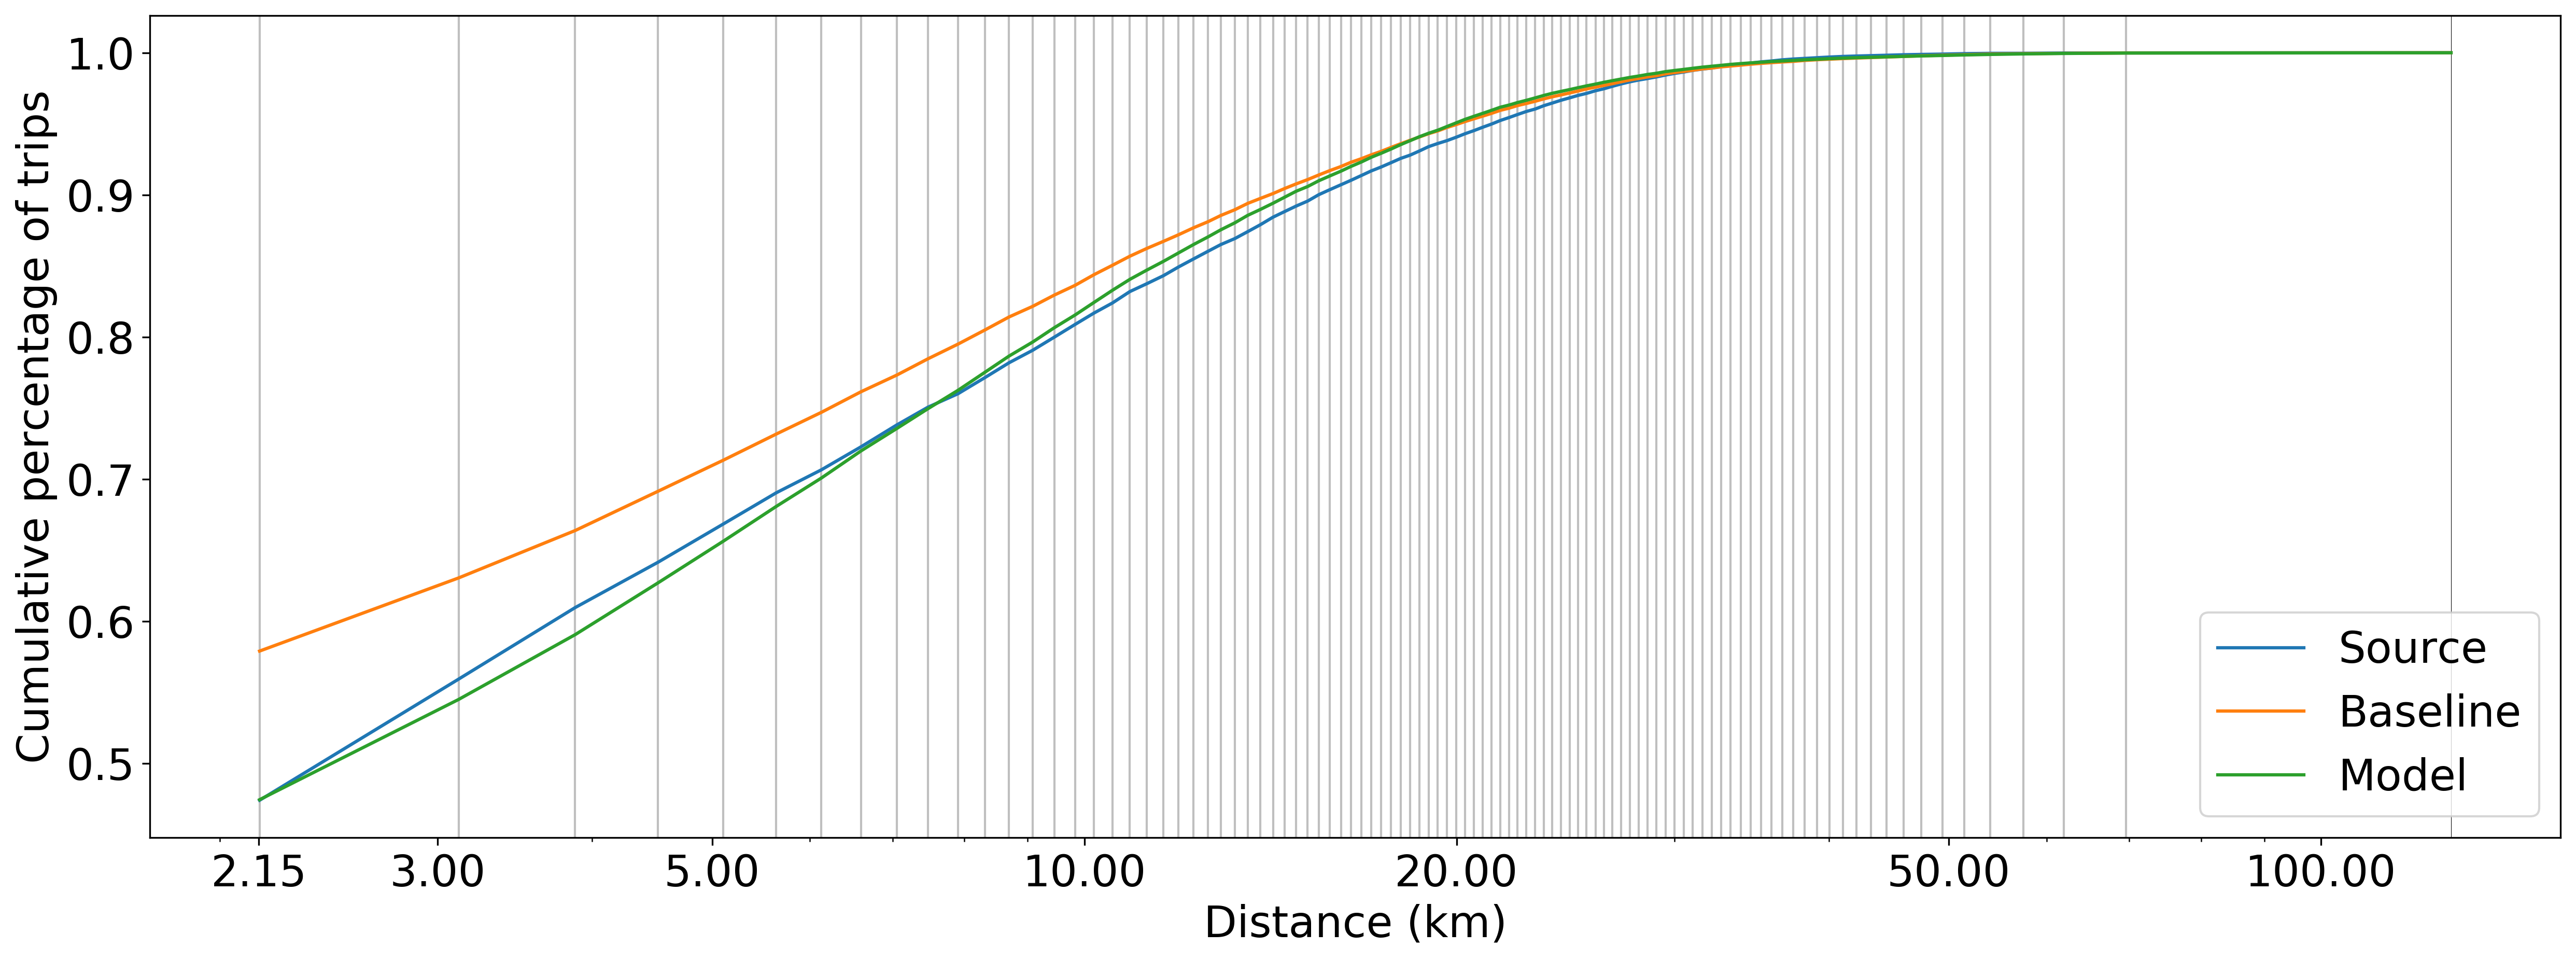

In [25]:
mpl.rcParams['font.size'] = 20.0
fig, ax = plt.subplots(1,1, figsize=(20,7), sharex=True)
plots.generic_plot_dist_distribution(
    ax, 
    [
        dms['groundtruth_sum'],
        dms['model_sum_baseline'],
        dms['model_sum'],
    ], ["Source", "Baseline", "Model"], ticks=[2.15, 3, 5, 10, 20, 50, 100], yscale='linear')

# Sweden

In [10]:
region = 'sweden'
scale= 'west'

In [11]:
p = "{}/{}/distance-metrics-{}.csv".format(results_dir, 'model', scale)
p_base = "{}/{}/distance-metrics-{}.csv".format(results_dir, 'baseline', scale)
dms = pd.read_csv(p).set_index(['distance'])
dms_base = pd.read_csv(p_base).set_index(['distance'])

In [12]:
dms = dms.join(dms_base['model_sum'], rsuffix='_baseline')[['sampers_sum', 'model_sum', 'model_sum_baseline']]

In [13]:
dms.index = pd.IntervalIndex.from_tuples([tuple(list(map(float, idx.replace('(', '').replace(']', '').split(",")))) for idx in dms.index])

west


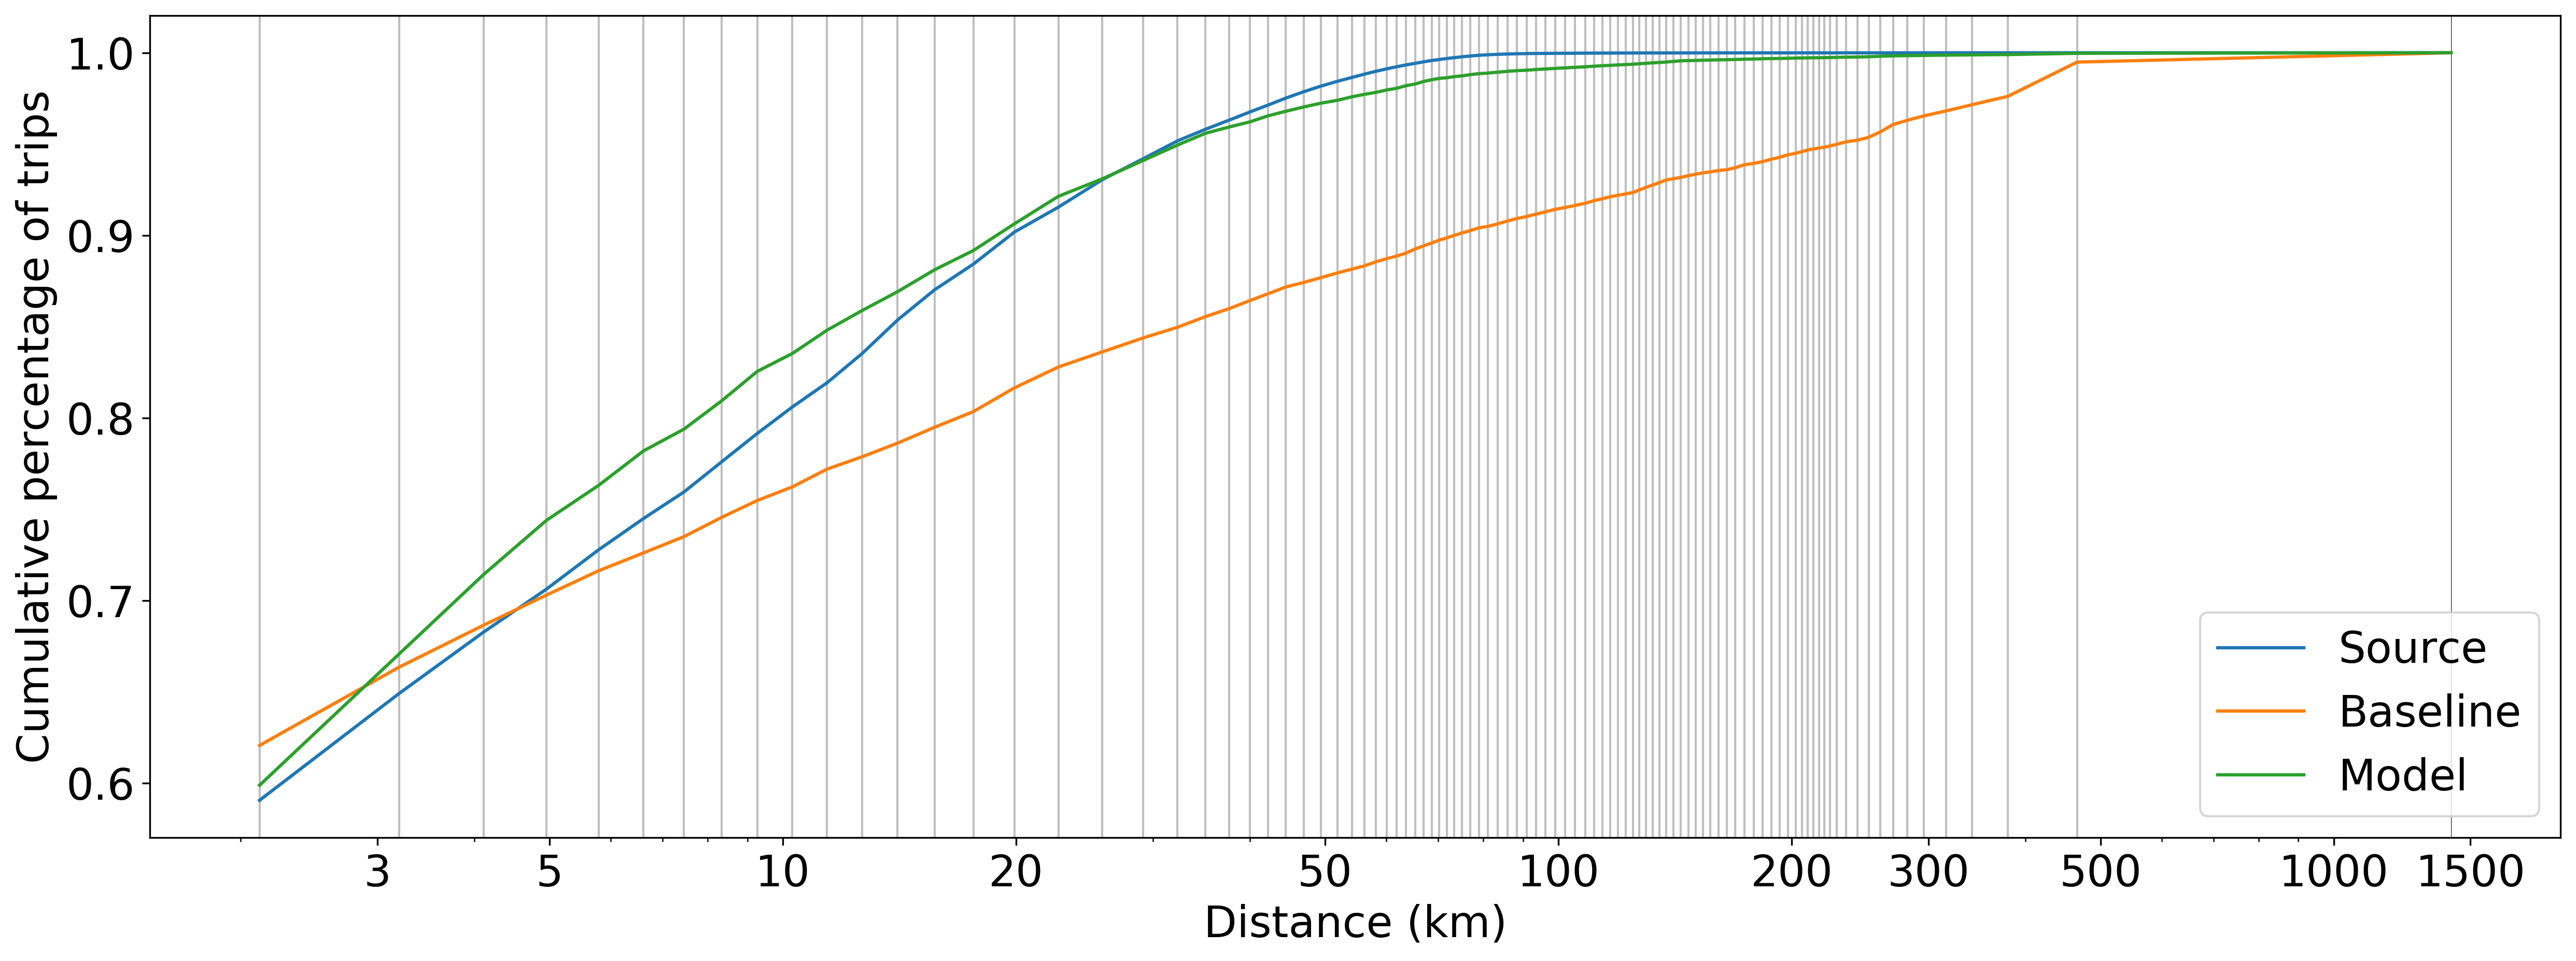

In [14]:
if scale == 'national':
    dms = dms[dms['model_sum'] != 0.0]
mpl.rcParams['font.size'] = 20.0
fig, ax = plt.subplots(1,1, figsize=(20,7), sharex=True)
plots.generic_plot_dist_distribution(
    ax, 
    [
        dms['sampers_sum'],
        dms['model_sum_baseline'],
        dms['model_sum'],
    ], ["Source", "Baseline", "Model"], yscale='linear', ticks=[3, 5, 10, 20, 50,100, 200, 300, 500, 1000, 1500])
print(scale)